# PCA

[from here](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html)

In [3]:
import numpy as np

np.random.seed(4294967295) # random seed for consistency

# A reader pointed out that Python 2.7 would raise a
# "ValueError: object of too small depth for desired array".
# This can be avoided by choosing a smaller random seed, e.g. 1
# or by completely omitting this line, since I just used the random seed for
# consistency.

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

Populating the interactive namespace from numpy and matplotlib


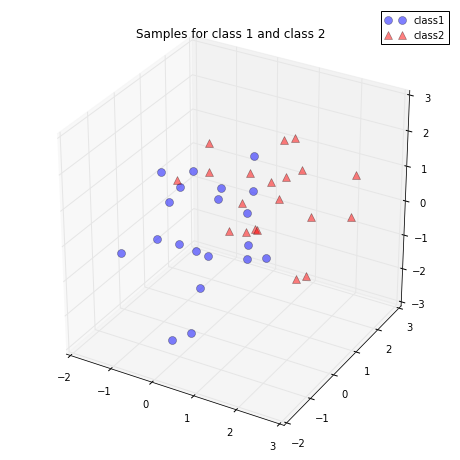

In [6]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

## 1. Taking the whole dataset ignoring the class labels

In [7]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

## 2. Computing the d-dimensional mean vector

In [8]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.55833188]
 [ 0.43288583]
 [ 0.30630128]]


## 3. a) Computing the Scatter Matrix

In [11]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[ 45.53462832   2.17367273   8.90932866]
 [  2.17367273  49.58879709   9.06545317]
 [  8.90932866   9.06545317  47.62915361]]


## 3. b) Computing the Covariance Matrix (alternatively to the scatter matrix)

In [10]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.16755457  0.0557352   0.22844432]
 [ 0.0557352   1.27150762  0.23244752]
 [ 0.22844432  0.23244752  1.22126035]]


## 4. Computing eigenvectors and corresponding eigenvalues

In [12]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.45180959]
 [-0.58843731]
 [-0.67052937]]
Eigenvalue 1 from scatter matrix: 61.58793221036252
Eigenvalue 1 from covariance matrix: 1.5791777489836556
Scaling factor:  39.0
----------------------------------------
Eigenvector 2: 
[[-0.68317733]
 [ 0.71157059]
 [-0.16412199]]
Eigenvalue 2 from scatter matrix: 45.410934492796436
Eigenvalue 2 from covariance matrix: 1.164382935712731
Scaling factor:  39.0
----------------------------------------
Eigenvector 3: 
[[-0.57370448]
 [-0.38393857]
 [ 0.72350144]]
Eigenvalue 3 from scatter matrix: 35.75371232312346
Eigenvalue 3 from covariance matrix: 0.9167618544390631
Scaling factor:  39.0
----------------------------------------


### Checking the eigenvector-eigenvalue calculation

In [13]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

### Visualizing the eigenvectors

Populating the interactive namespace from numpy and matplotlib


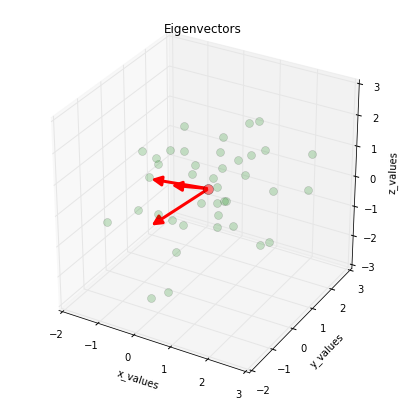

In [14]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

## 5.1. Sorting the eigenvectors by decreasing eigenvalues

In [15]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

In [16]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

61.5879322104
45.4109344928
35.7537123231


## 5.2. Choosing k eigenvectors with the largest eigenvalues

In [18]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.45180959 -0.68317733]
 [-0.58843731  0.71157059]
 [-0.67052937 -0.16412199]]


# 6. Transforming the samples onto the new subspace

In [19]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

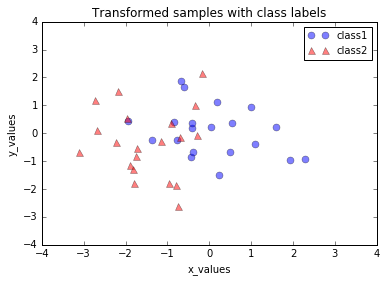

In [20]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

# Using the PCA() class from the matplotlib.mlab library

PC axes in terms of the measurement axes scaled by the standard deviations:
 [[-0.52565397 -0.51606631 -0.67628653]
 [ 0.69754519 -0.71652606  0.00459505]
 [-0.48694827 -0.46932501  0.73662434]]


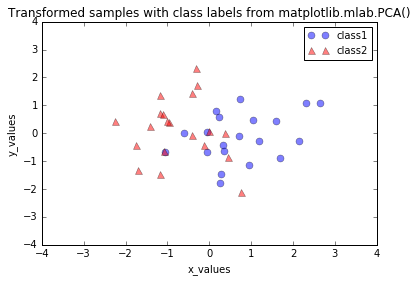

In [30]:
from matplotlib.mlab import PCA as mlabPCA

mlab_pca = mlabPCA(all_samples.T)

print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:20,0],mlab_pca.Y[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[20:40,0], mlab_pca.Y[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

## Using the PCA() class from the sklearn.decomposition library to confirm our results

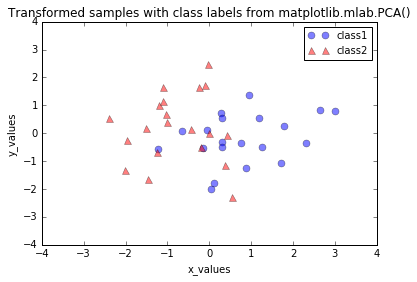

In [34]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

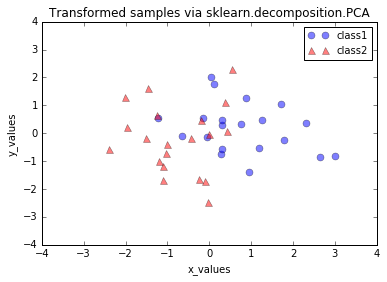

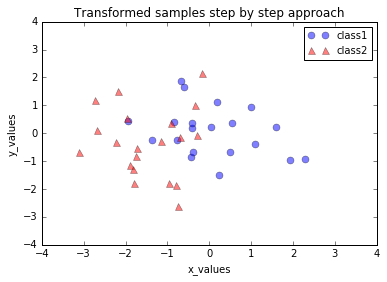

In [36]:

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1]*-1, 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1]*-1, '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

# step by step PCA
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')
plt.show()